<hr style="border: 6px solid#003262;" />

<div align="center">
    <img src= "/assets/content/datax_logos/DataX_blue_wide_logo.png" align="center" width="100%">
</div>


<br>

# **DATA-X:** <br>  m420 - BREAD &amp; BUTTER DEEP LEARNING - REGRESSION AND CLASSIFICATION USING TENSORFLOW v2 AND LUDWIG

<br>


<br>



**Author List (in no particular order):** [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/), [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/), and [Debbie Yuen](http://www.debbiecyuen.me/). 

**About (TL/DR):** Tensorflow (TF) is an open-source library used for dataflow, differentiable programming, symbolic math, and machine learning applications such as deep learning neural networks. [Ludwig](https://ludwig-ai.github.io/ludwig-docs/index.html) is a toolbox built atop TF that enables users the ability to train and test deep learning models without the need to write code.

**Learning Goal(s):** This notebook covers advanced topics in machine learning. However, it does not require any prior knowledge in machine learning. The goal of this notebook is to teach a user how to deploy deep learning regression and classification models, using structured data. This task is so common to machine learning, that it is pretty much the bread and butter of ML engineers. 

**Associated Materials:** To ease the learning curve, we encourage the user of this notebook to visit the [Data-X](https://datax.berkeley.edu/) site for resources on fundamentals of machine learning, and an introductoin to TensorFlow v2.

**Keywords (Tags):** tensorflow, tensor-flow, tensorflow-tutorial, deep-learning, deep-learning-with-python, neural-networks, Ludwig, deep-learning-toolbox, data-x, uc-berkeley-engineering 

**Prerequisite Knowledge:** (1) Python, (2) Pandas, (3) Matplotlib, (4) TensorFlow v2 

**Target User:** Data scientists, applied machine learning engineers, and developers

**Copyright:** Content curation has been used to expedite the creation of the following learning materials. Credit and copyright belong to the content creators used in facilitating this content. Please support the creators of the resources used by frequenting their sites, and social media.


<hr style="border: 4px solid#003262;" />

<a name='Part_table_contents' id="Part_table_contents"></a>



#### CONTENTS

> #### [PART 0: ABOUT AND MOTIVATION](#Part_0)
> #### [PART 1: TENSORS AND OPERATIONS](#Part_1)
> #### [PART 2: TENSORFLOW GRAPHS, AND EXECUTIONS](#Part_2)
> #### [PART 3 (OPTIONAL): TENSORFLOW LINEAR REGRESSION](#Part_3)
> #### [PART 4: WRAP UP AND NEXT STEPS](#Part_4)

#### APPENDIX

> #### [TENSORFLOW INSTALLATION](#Appendix_1)
> #### [PREREQUISITE KNOWLEDGE AND REQUIREMENTS](#Appendix_2)
> #### [REFERENCES AND ADDITIONAL RESOURCES](#Appendix_3)

<br>


<a id='Part_0'></a>

<hr style="border: 2px solid#003262;" />

#### PART 0

## **ABOUT** AND **MOTIVATION** NEED VIDEO FROM DEBBIE

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
  <a href="">
    <img src="assets/content/images/tensorflow_thumbnail_play-01.png" align="center" width="50%" padding="10px"/>
  </a><br>
</div>

<a id='Part_1'></a>

<hr style="border: 2px solid#003262;" />

#### PART 1 

## **LINEAR** REGRESSION **TENSORFLOW v2**

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="assets/content/images/tF_update-05.png" align="center" width="50%" padding="0px"><br>
    Predicting Fuel Efficiency
</div>

<br>

In a [**regression**](https://en.wikipedia.org/wiki/Regression_analysis) problem, we aim to predict the output of a continuous variable -- e.g. $y$ -- subject to some input variable(s) -- e.g. $x_i, ~ i = 1, 2, \dots$ 

The following example uses the [**Auto MPG**](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset to build a predictive model of the fuel efficiency of late 1970s and early 1980s automomibles.  This example uses [**Keras**](https://www.tensorflow.org/api_docs/python/tf/keras) to simplify the process. 

#### CONTENTS:

> [PART 1.1: PROBLEM DEFINITION AND SETUP](#Part_1_1)<br>
> [PART 1.2: MODEL](#Part_1_2)<br>
> [PART 1.3: GENERALIZATION AND PREDICTIONS](#Part_1_3)

<a id='Part_1_1'></a>

<hr style="border: 1px solid#003262;" />

#### PART 1.1: PROBLEM DEFINITION AND SETUP

<br>

#### **1.1.0 Install Required Packages**
___


In [ ]:
# Use Matplotlib + Seaborn for plots
!python -m pip install -U pip
!python -m pip install -U matplotlib
!pip install -q seaborn

In [ ]:
# Gather some useful functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

<br>

#### **1.1.1 General Setup**
___


In [1]:
## import required libraries ##
# for declaring paths
import pathlib

# for plotting and data manipulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

# for modeling and visualizing NN
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


2.2.0


<br>

#### **1.1.2 Gather and Clean Data**

___


In [54]:
# download dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/ehch/.keras/datasets/auto-mpg.data'

In [55]:
# import data using pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


<br>

**Clean the Data**

In [56]:
# drop rows with missing values
dataset = dataset.dropna()

# Sanity check
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [57]:
# note that 'Origin' column is categorial and not numeric. 
dataset.Origin.unique()

array([1, 3, 2])

In [58]:
# We use one-hot encoding to convert
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [59]:
# we now want to convert categorical variables into indicators
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


<br>

#### **1.1.3 Split Data Into Training and Testing Sets, and Inspect Data**

___


In [60]:
# split data
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

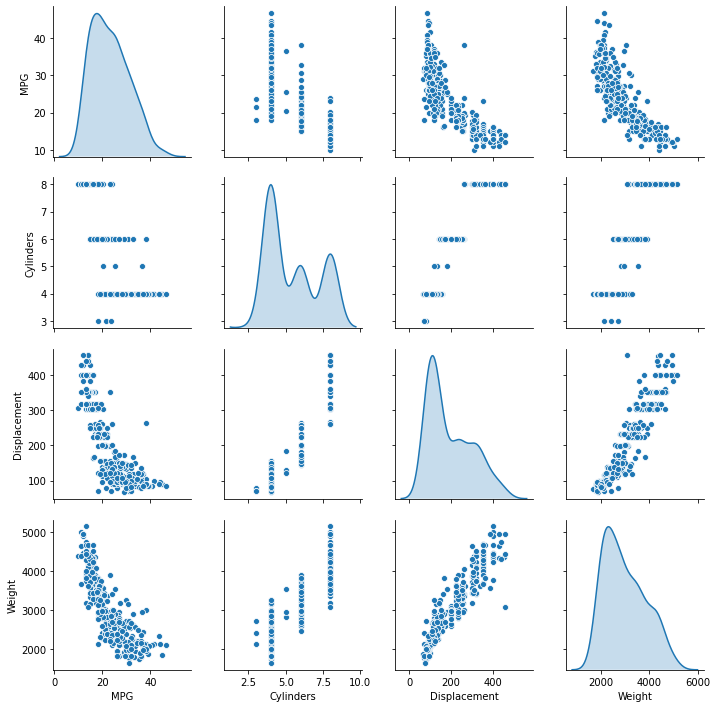

In [61]:
# visualize the distribution of the data
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [62]:
# view statistical summary data
train_stats = train_dataset.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [63]:
# since MPG is response variable, we remove it to simplify stats
train_stats.pop("MPG")
train_stats

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [64]:
# columns <--> rows
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


<br>

**Split Features From Labels**

In [66]:
# remove Label from training and testing sets
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, dtype: float64

<br>

**Normalize Data**

___
**Note:** Looking at ```train_stats``` we see that the scale and range between feates is at times 3-orders of maginitude appart. We want to [**normalize**](https://www.usna.edu/Users/cs/taylor/courses/si486l/notes/regLinReg.html) our features so that our ranges are closer and so that it takes less time to train our model. Normalizing also makes the resulting model dependent on the choice of units used in the input.
___

In [67]:
# normalize data function uses statiistical summary data
def norm(x):
  return((x - train_stats['mean']) / train_stats['std'])

In [75]:
# normalize training and testing sets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

<!--Navigate back to table of contents-->
<div alig="right" style="text-align: right">
    <span>
        <a style="color:#FFFFFF; background-color:#003262; border:1px solid #FFFFFF; border-color:#FFFFFF;border-radius:5px;border-width:0px;display:inline-block;font-family:arial,helvetica,sans-serif;font-size:10px;letter-spacing:0px;line-height:10px;padding:10px 20px;text-align:center;text-decoration:none; align:center" href="#Part_table_contents" name="Table of Contents"  id="Part_table_contents"> 
            Table of Contents 
        </a>
    </span>
</div>
<!-------------------------------------->

<a id='Part_1_2'></a>

<hr style="border: 1px solid#003262;" />

#### PART 1.2: MODEL

<br>

<br>

#### **1.2.1 Build Shallow Model**

___


<br>

We will be building a [**sequential model**](https://youtu.be/CznICCPa63Q) with [**one densely connected hidden layer**](https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html) and [**one ouput layer**](http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/). A model with one hidden layer is generally referred to as a [**shallow neural network**](https://link.springer.com/chapter/10.1007/978-3-319-94463-0_2). We are building such a sequential model in order to preserve order in sequences, keep track of long-term dependencie, and maintain the relationships between variables -- while attempting to ensure that the modeling procedure is clearly presented and understood. Subsequent [**Data-X**](https://datax.berkeley.edu/) JupyterLabs will cover Neural Networks in greater detail.

In [76]:
# wrapper function for building sequential model using keras
def build_model():
  model = keras.Sequential([
    # dense hidden layer  
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    # dense output layer
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return(model)

In [77]:
# instantiate model
model = build_model()

<br>

**Inspect the Model**

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [79]:
# try out the model with a sample
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.10221224],
       [-0.28791767],
       [-0.13055103],
       [ 0.09217304],
       [-0.6492865 ],
       [ 0.13241245],
       [-0.6800544 ],
       [ 0.30511522],
       [-0.0206103 ],
       [-0.913821  ]], dtype=float32)

<br>

#### **1.2.2 Train Model**

___


In [80]:
# 1 epoch equal to one forward and one backward pass on all training examples
EPOCHS = 1000

# fit model
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:591.6313,  mae:23.0616,  mse:591.6313,  val_loss:602.8695,  val_mae:23.2937,  val_mse:602.8695,  
....................................................................................................
Epoch: 100, loss:8.0927,  mae:1.9660,  mse:8.0927,  val_loss:7.9406,  val_mae:2.1554,  val_mse:7.9406,  
....................................................................................................
Epoch: 200, loss:6.5143,  mae:1.7642,  mse:6.5143,  val_loss:7.9141,  val_mae:2.1764,  val_mse:7.9141,  
....................................................................................................
Epoch: 300, loss:5.9625,  mae:1.6888,  mse:5.9625,  val_loss:8.1662,  val_mae:2.1993,  val_mse:8.1662,  
....................................................................................................
Epoch: 400, loss:5.6679,  mae:1.6314,  mse:5.6679,  val_loss:8.2503,  val_mae:2.2236,  val_mse:8.2503,  
..............................................................

___

**Note:** the ```build_model()``` function can be split into its components and ran independently.

```python
# Build 1 layer sequential model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(10)
])

# Compile model
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'],
              )

# fit model, over 1000 epoch
model.fit(normed_train_data, 
          train_labels, 
          epochs=1000, 
          validation_split=0.2, 
          verbose=0, 
          callbacks=[tfdocs.modeling.EpochDots()])
          
```
___

<br>

**Visualize Model's Progress**

In [81]:
# extract stored history data
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,591.631348,23.061644,591.631348,602.869507,23.293678,602.869507,0
1,573.859436,22.700266,573.859436,586.441956,22.952890,586.441956,1
2,559.495605,22.395348,559.495605,571.129456,22.635103,571.129456,2
3,545.877869,22.104668,545.877869,556.520142,22.324499,556.520142,3
4,532.555725,21.816660,532.555725,541.738953,22.006620,541.738953,4


Text(0, 0.5, 'MAE [MPG]')

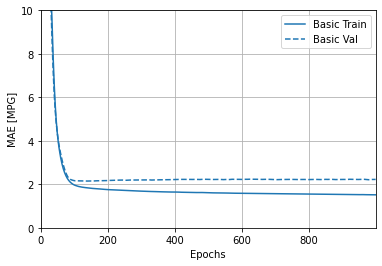

In [83]:
# plot history data - Mean Absolute Error over Epochs
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [$MPG^2$]')

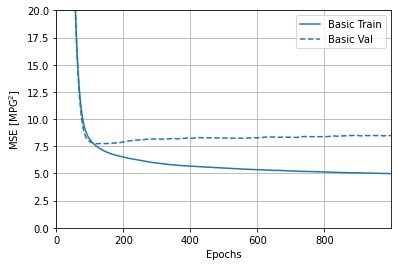

In [86]:
# plot history data - Mean Absolute Error over Epochs
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [$MPG^2$]')

___

**Note:** The $MSE[MPG^2]$ over Epoch plot displays little improvement, or even degradation in the validation error after about 100 epochs. We can implement an [**EarlyStopping callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then training automatically stops.

___

<br>

#### **1.2.3 Re-train Model Using EarlyStopping and TensorBoard**

___

**General Set Up**

In [90]:


## Load additional libraries needed ##
from datetime import datetime
from IPython.display import clear_output, Image, display, HTML
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

<br>

**TensorBoard Callbacks**

In [92]:
# place logs in a timestamped subdirectory and enable histogram computation with every epoch
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

<br>

**Build Model**

In [93]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tensorboard_callback])

<br>

**Visualize Model Using TensorFlow (with callbacks)**

In [94]:
## %tensorboard line magic. In command line run same command without "%" ##
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4823), started 1 day, 4:41:25 ago. (Use '!kill 4823' to kill it.)

<a id='Part_1_3'></a>

<hr style="border: 1px solid#003262;" />

#### PART 1.3: GENERALIZATION AND PREDICTIONS


<br>

<br>

#### **1.3.1 Generalization**

___

<br>

We want to see how well the [**model generalizes**](https://developers.google.com/machine-learning/crash-course/generalization/video-lecture) by usting the **test** set we isolated during our training/testing split. 

In [95]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.4844 - mae: 1.7744 - mse: 5.4844
Testing set Mean Abs Error:  1.77 MPG


<br>

#### **1.3.2 Make Predictions**

___

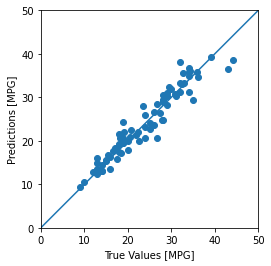

In [96]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<br>

**Error Distribution**

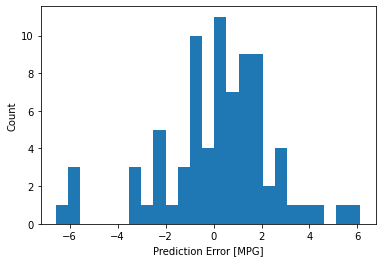

In [97]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

<!--Navigate back to table of contents-->
<div alig="right" style="text-align: right">
    <span>
        <a style="color:#FFFFFF; background-color:#003262; border:1px solid #FFFFFF; border-color:#FFFFFF;border-radius:5px;border-width:0px;display:inline-block;font-family:arial,helvetica,sans-serif;font-size:10px;letter-spacing:0px;line-height:10px;padding:10px 20px;text-align:center;text-decoration:none; align:center" href="#Part_table_contents" name="Table of Contents"  id="Part_table_contents"> 
            Table of Contents 
        </a>
    </span>
</div>
<!-------------------------------------->

<a id='Part_4'></a>

<hr style="border: 2px solid#003262;" />

#### PART 4

## **WRAP-UP** AND **NEXT** STEPS


<div align="center">
    <img src= "/assets/content/datax_logos/DataX_icon_wide_logo.png" align="center" width="80%" padding="20">
</div>

<br>

As you may have started to notice, that there is much more than can be done using Flask. Wanting to learn other uses of Flask?  Visit the [**Data-X website**](https://datax.berkeley.edu/) to learn more, or use the following links to topics of interest:

> [TODO (m---): url needed]() TODO TODO TODO <br>
> [TODO (m---): url needed]() TODO TODO TODO <br>
> [TODO (m---): url needed]() TODO TODO TODO



<br>

<br>


<!--Navigate back to table of contents-->
<div alig="right" style="text-align: right">
    <span>
        <a style="color:#FFFFFF; background-color:#003262; border:1px solid #FFFFFF; border-color:#FFFFFF;border-radius:5px;border-width:0px;display:inline-block;font-family:arial,helvetica,sans-serif;font-size:10px;letter-spacing:0px;line-height:10px;padding:10px 20px;text-align:center;text-decoration:none; align:center" href="#Part_table_contents" name="Table of Contents"  id="Part_table_contents"> 
            Table of Contents 
        </a>
    </span>
</div>
<!-------------------------------------->

<a id='Appendix_1'></a>

<hr style="border: 6px solid#003262;" />

#### APPENDIX I


## **TENSORFLOW** INSTALLATION



<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="/assets/content/images/tf_logo_social.png" align="center" width="30%" padding="0px"><br>
    <br>
</div>

<br>

#### **Appendix I.1 Install Python Development Environment**

___

#### **Install/Update pip3**

https://pip.pypa.io/en/stable/installing/

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```

<br>

#### **Install/Update Python 3**

https://www.python.org/downloads/

```bash
    # TensorFlow requires Python 3.5-3.8 
    $ sudo apt-get update && sudo apt-get install python3-dev python3-pip python3-venv python-virtualenv
```

<br>

#### **Appendix I.2 Create Virtual Environgment (Recommended)**


___

**Create virtual environment**

>On a terminal, or using magic keys, create a new virtual environment using a Python interpreter and creating a ```venv``` directory to hold it

```bash
    $ python3 -m venv venv
```

<br>

**Activate the virtual environment**

```bash
    $ source ./venv/bin/activate      # sh, bash, or zsh

    $ . ./venv/bin/activate.fish       # fish

    $ source ./venv/bin/activate.csh  # csh or tcsh
```

<br>

**Install packages within virtual environment**

When the virtual environment is active, your shell prompt is prefixed by ```(venv)```

> Step 1: reapeat 1.1.1 above, within ```(venv)```<br>

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```    

> Step 2: Install TensorFlow2

```bash
    (venv) $ pip install --upgrade tensorflow
```


> Step 3: Verify install

```bash
    (venv) $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
```

> Step 4: To exit virtual enviroment later

```bash
    (venv) $ pip deactivate
```

<br>

#### **Appendix I.3 Install TensorFlow on Local Machine (Optional Setup)**

___


**TensorFlow 2**

https://www.tensorflow.org/install/pip

```bash
    # Install using pip
    $ pip install --upgrade tensorflow 
```

<br>

**Verify Installation**

```bash
    $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
```

<br>

#### **Appendix I.4 Run TensorFlow in a Container (Optional Setup)**

___

<br>

[**Tensorflow Docker images**](https://www.tensorflow.org/install/docker) come pre-configured to run TensorFlow, and provide a virtual environment that is generally the easiest way to set up [**GPU processing**](https://www.tensorflow.org/install/gpu). To learn more about how to use [**Docker**](https://www.tensorflow.org/install/docker/) to separate your applications from your infrastructure, click [here](https://docs.docker.com/get-docker/).

<br>

<a id='Appendix_2'></a>

<hr style="border: 2px solid#003262;" />


#### APPENDIX II


## PREREQUISITE **KNOWLEDGE** AND **REQUIREMENTS**


[**TODO**](https://pandas.pydata.org/about/) TODO TODO TODO

##### **PYTHON**
This notebook and the executable files are built using [**Python**](https://www.python.org/) and relies on common Python packages (e.g. [**NumPy**](https://numpy.org/)) for operation. If you have a lot of programming experience in a different language (e.g. C/C++/Matlab/Java/Javascript), you will likely be fine, otherwise:

> [**Python (EDX free)**](https://www.edx.org/course?search_query=python)<br>
> [**Python (Coursera free)**](https://www.coursera.org/search?query=python)


##### **NUMPY**
This notebook and the executable files are built using [**Python**](https://www.python.org/) and relies on common Python packages (e.g. [**NumPy**](https://numpy.org/)) for operation. If you have a lot of programming experience in a different language (e.g. C/C++/Matlab/Java/Javascript), you will likely be fine, otherwise:

> [**Python (EDX free)**](https://www.edx.org/course?search_query=python)<br>
> [**Python (Coursera free)**](https://www.coursera.org/search?query=python)


##### **MATPLOTLIB**

<a id='Appendix_3'></a>

<hr style="border: 2px solid#003262;" />

#### APPENDIX III


## **REFERENCES** AND ADDITIONAL **RESOURCES**

<br>


> [TensorFlow Tutorials](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)<br>
> [TensorFlow Guide](https://youtu.be/dcqPhpY7tWk) <br>
> [Introduction to TensorFlow by Andrew Ng and Kian Katanforoosh](https://cs230.stanford.edu/blog/tensorflow/)<br>
> [Deep Learning Illustrated by Jon Krohn, Grant Beyleveld, and Aglae Bassens](https://www.deeplearningillustrated.com/)<br>
> [Hands-On Introduction to TensorFlow 2.0 by Josh Gordon and Amit Patankar](https://youtu.be/Yyv-ng0_OTU)<br>
> [Getting Started with TensorFlow and Deep Learning by Josh Gordon](https://youtu.be/tYYVSEHq-io)

<!--Navigate back to table of contents-->
<div alig="right" style="text-align: right">
    <span>
        <a style="color:#FFFFFF; background-color:#003262; border:1px solid #FFFFFF; border-color:#FFFFFF;border-radius:5px;border-width:0px;display:inline-block;font-family:arial,helvetica,sans-serif;font-size:10px;letter-spacing:0px;line-height:10px;padding:10px 20px;text-align:center;text-decoration:none; align:center" href="#Part_table_contents" name="Table of Contents"  id="Part_table_contents"> 
            Table of Contents 
        </a>
    </span>
</div>
<!-------------------------------------->

<hr style="border: 6px solid#003262;" />
